In [1]:
## Importing libraries 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pygwalker as pyg
import warnings 
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline
from sklearn.decomposition import PCA
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import tree

from sklearn.svm import SVC



INFO: Pandas backend loaded 1.4.4
INFO: Numpy backend loaded 1.21.5
INFO: Pyspark backend NOT loaded
INFO: Python backend loaded


In [2]:
initial_data=pd.read_csv("https://raw.githubusercontent.com/Chandrashekhar0106/ml_credit_card_default/main/UCI_Credit_Card.csv")

In [3]:
pd.pandas.set_option('display.max_columns',None)

In [4]:
initial_data


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [5]:
## Checking Null Values in dataset 

initial_data.isnull().sum()  ## no null values 

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
## Checking unique value 

initial_data.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [7]:
## Checking duplicate value 

initial_data.duplicated().sum()  ## no duplicate values

0

In [8]:
## checking categorical columns 

cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month']

for col in cat_cols:
    print(f'Column {col}:')
    print(initial_data[col].value_counts())
    print('\n')

Column SEX:
2    18112
1    11888
Name: SEX, dtype: int64


Column EDUCATION:
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


Column MARRIAGE:
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


Column PAY_0:
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64


Column PAY_2:
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64


Column PAY_3:
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64


Column PAY_4:
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64


Column PAY_5:
 0    16947

In [9]:
## We see that the EDUCATION column includes the categories 5, 6 and 0, which are not included in the data specification. Assigning these values to 4, which stands for 'Other': 
initial_data.loc[initial_data['EDUCATION'].isin([5, 6, 0]), 'EDUCATION'] = 4

In [10]:
## The MARRIAGE column includes the category 0. Assigning such entries to 3, which stands for 'Other'
initial_data.loc[initial_data['MARRIAGE'] == 0, 'MARRIAGE'] = 3

In [11]:
## The columns PAY_0 - PAY_6 contain the categories -2 and 0. Assigning all such values to 0, which we will define to stand for 'Other':

pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in pay_cols:
    initial_data.loc[initial_data[col] == -2, col] = 0

In [12]:
## Checking the data types of the columns:

initial_data.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [13]:
initial_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,0.167233,0.118367,0.106133,0.069200,0.036867,0.035233,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,0.931323,0.965844,0.950876,0.911613,0.864561,0.867919,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [14]:
initial_data=initial_data.drop(columns=['default.payment.next.month','ID'],axis=1)

In [15]:
initial_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [16]:

pf = ProfileReport(initial_data)
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
## converting our data into standard normal distribution using standard scaler.
scaler=StandardScaler()
df_scaled=scaler.fit_transform(initial_data)

In [18]:
scaled_1_data=pd.DataFrame(df_scaled,columns=initial_data.columns)

In [19]:
scaled_1_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,0.810161,0.211870,-1.068797,-1.246020,1.967951,1.948209,-1.163297,-1.172885,-0.042643,-0.040596,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.211870,0.849131,-1.029047,-1.253328,1.948209,-0.111618,-0.075911,-0.042643,2.263805,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.211870,0.849131,-0.161156,-0.179568,-0.122555,-0.111618,-0.075911,-0.042643,-0.040596,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.211870,-1.068797,0.164303,-0.179568,-0.122555,-0.111618,-0.075911,-0.042643,-0.040596,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.211870,-1.068797,2.334029,-1.253328,-0.122555,-1.163297,-0.075911,-0.042643,-0.040596,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,1.555086,-1.068797,0.381275,-0.179568,-0.122555,-0.111618,-0.075911,-0.042643,-0.040596,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130
29996,-0.134759,-1.234323,1.555086,0.849131,0.815221,-1.253328,-1.157936,-1.163297,-1.172885,-0.042643,-0.040596,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382
29997,-1.059646,-1.234323,0.211870,0.849131,0.164303,4.115470,2.983590,1.991740,-1.172885,-0.042643,-0.040596,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001
29998,-0.674276,-1.234323,1.555086,-1.068797,0.598248,0.894191,-1.157936,-0.111618,-0.075911,-0.042643,-1.192796,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904


In [20]:
scaled_1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  float64
 2   EDUCATION  30000 non-null  float64
 3   MARRIAGE   30000 non-null  float64
 4   AGE        30000 non-null  float64
 5   PAY_0      30000 non-null  float64
 6   PAY_2      30000 non-null  float64
 7   PAY_3      30000 non-null  float64
 8   PAY_4      30000 non-null  float64
 9   PAY_5      30000 non-null  float64
 10  PAY_6      30000 non-null  float64
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

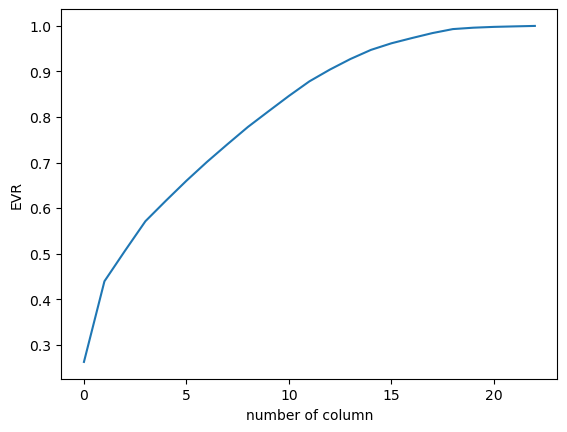

In [21]:
pca  = PCA()
pca.fit_transform(scaled_1_data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of column')
plt.ylabel('EVR')
plt.show()

In [22]:
pca1=PCA(n_components= 15)

In [23]:
new_data=pca1.fit_transform(scaled_1_data)

In [24]:
new_data

array([[-1.73357167, -1.13086279, -0.25261905, ..., -1.32502726,
        -0.63553829, -2.00460151],
       [-1.44019728, -1.5076106 ,  0.92185669, ...,  0.1733199 ,
        -0.20568744, -0.23066894],
       [-1.25383105, -0.20453672,  0.19704131, ...,  0.37798024,
         0.48532815,  0.00493931],
       ...,
       [-0.52622297, -3.2395734 ,  0.67674994, ...,  0.45754806,
         0.33778941, -1.05693776],
       [ 0.6103572 ,  1.23924484,  0.44045786, ..., -0.83294654,
        -0.33299863, -1.02645155],
       [-0.48326359, -0.17576367, -1.44074959, ..., -0.71744238,
         0.52657115,  0.0128408 ]])

In [25]:
pd.DataFrame(new_data, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-1.733572,-1.130863,-0.252619,-0.295739,0.869925,-0.725223,-1.036093,0.346901,-0.091863,0.576114,1.923973,-0.029984,-1.325027,-0.635538,-2.004602
1,-1.440197,-1.507611,0.921857,-0.751409,0.678227,-0.520181,0.305692,0.202351,-0.144636,0.038785,-0.657667,0.500947,0.173320,-0.205687,-0.230669
2,-1.253831,-0.204537,0.197041,-0.655677,0.735225,-0.333518,-0.068781,-0.133237,-0.183037,0.051445,-0.201658,0.101901,0.377980,0.485328,0.004939
3,-0.536211,-0.151173,-0.968436,0.154699,0.691685,-0.637041,0.220634,-0.009857,0.070358,-0.064533,0.026967,0.026473,-0.907255,0.300326,0.024151
4,-1.037514,0.857485,-1.130772,2.120009,-0.116382,1.481339,0.873283,0.083372,0.608616,-0.333346,-0.016581,1.171480,-0.321912,1.332503,0.079654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2.506192,0.528611,-1.765958,0.479983,0.411556,1.381280,0.147284,-0.807944,0.039059,-0.381594,0.229614,0.200106,-0.102466,-1.067054,0.158410
29996,-1.948283,1.337793,-0.766001,0.207372,0.563696,1.915584,0.352896,-0.109245,-0.001425,0.313711,-1.224541,0.471231,1.025206,-0.018540,-0.426804
29997,-0.526223,-3.239573,0.676750,0.426142,-0.266794,1.345732,-2.431013,1.022308,-0.359555,1.788742,3.102797,-0.817298,0.457548,0.337789,-1.056938
29998,0.610357,1.239245,0.440458,2.607824,1.190566,1.716194,-1.147546,-1.978686,1.433458,-1.287667,-0.537504,-4.223946,-0.832947,-0.332999,-1.026452


In [26]:
old_data = pd.read_csv("https://raw.githubusercontent.com/Chandrashekhar0106/ml_credit_card_default/main/UCI_Credit_Card.csv")

In [27]:
y= old_data.loc[:,"default.payment.next.month"]

In [28]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [29]:
x = pd.DataFrame(new_data, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15'])

In [30]:
## Model implementation

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt_model = DecisionTreeClassifier()
dt_model.fit(x,y)



DecisionTreeClassifier()

In [31]:
old_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [32]:
pca1.transform([[20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0]])

array([[  5604.95781226,   5168.9239974 ,    481.26091431,
          2210.76045452,  -8071.28947512,  -5452.03822269,
          1766.35153771,   -440.66100795,   -114.05246911,
            65.86370436,    726.09076026,    243.68690613,
         10862.36324484, -11529.18130418,    526.59093834]])

In [33]:
scaler=StandardScaler()
df_scaled_1=scaler.fit_transform(pca1.transform([[20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0]]))
dt_model.predict(pca1.transform(([[20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0]])))

array([1], dtype=int64)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.25, random_state=100)

In [35]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
dt_model.predict(x_test)

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [37]:
dt_model.score(x_test,y_test)

0.7208

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO: Fontsize 0.08 < 1.0 pt not allowed by FreeType. Setting fo

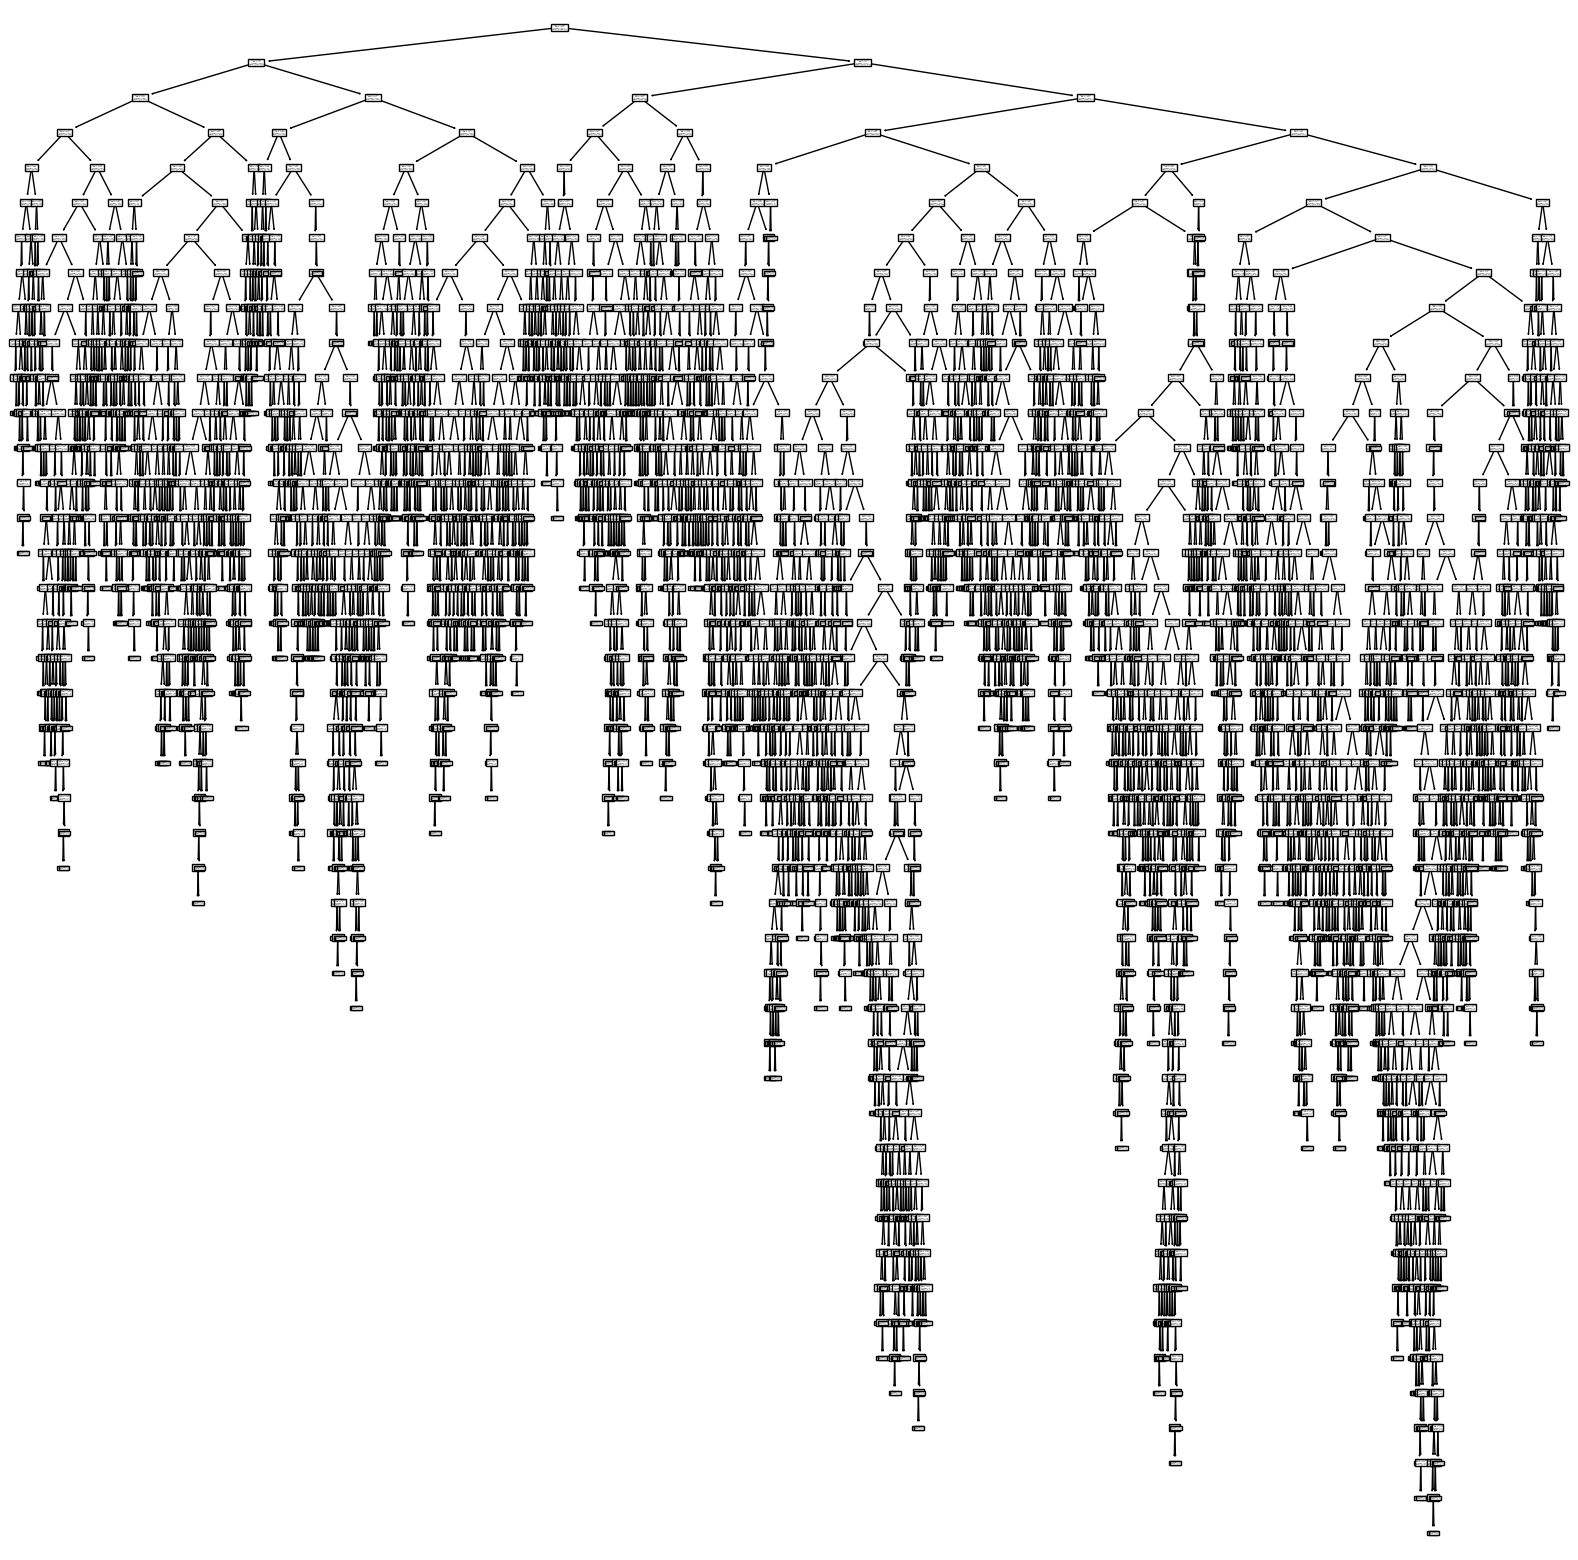

In [38]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model)

## As we can see that the tree is complex and we are not able to See a tree properly so we will use a small dataset.

In [41]:
reduced_data= x.head(30)

In [42]:
x1=reduced_data

In [43]:
y1= y.head(30)

In [44]:
dt_model2= DecisionTreeClassifier()

In [45]:
dt_model2.fit(x1,y1)

DecisionTreeClassifier()

In [46]:
plt.figure(figsize=(20,20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

[Text(0.4444444444444444, 0.875, 'X[1] <= -1.098\ngini = 0.391\nsamples = 30\nvalue = [22, 8]'),
 Text(0.2222222222222222, 0.625, 'X[12] <= 0.826\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.625, 'X[0] <= -2.173\ngini = 0.219\nsamples = 24\nvalue = [21, 3]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7777777777777778, 0.375, 'X[5] <= -1.743\ngini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]')]

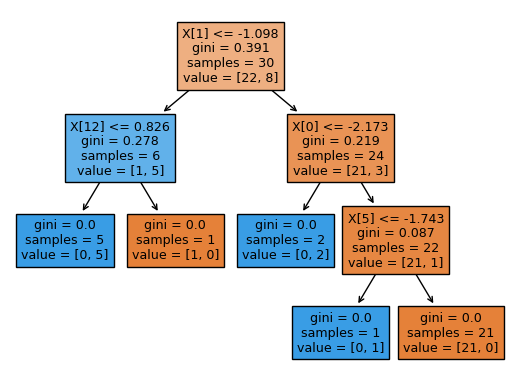

In [47]:
tree.plot_tree(dt_model2,filled=True)

In [48]:
dt_model2.predict(x1)

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [49]:
dt_model.score(x1,y1)

0.8333333333333334

In [50]:
dt_model2.score(x_test,y_test)

0.7636

In [51]:
## As we can see the test accuracy is low compared to seperated data  our goal is to bring train and test accuracy close and remove overfitting

path = dt_model2.cost_complexity_pruning_path(x1,y1)



In [52]:
ccp_alpha=path.ccp_alphas

In [53]:
dt_model3=[]
for ccp in ccp_alpha:
    dt_m=DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x1,y1)
    dt_model3.append(dt_m)
    
    dt_model3
    

In [54]:
dt_model3

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.05555555555555556),
 DecisionTreeClassifier(ccp_alpha=0.06363636363636367),
 DecisionTreeClassifier(ccp_alpha=0.11136363636363632),
 DecisionTreeClassifier(ccp_alpha=0.1605555555555555)]

In [55]:

train_score= [i.score(x1,y1)for i in dt_model3]

In [56]:
test_score=[i.score(x_test,y_test)for i in dt_model3]

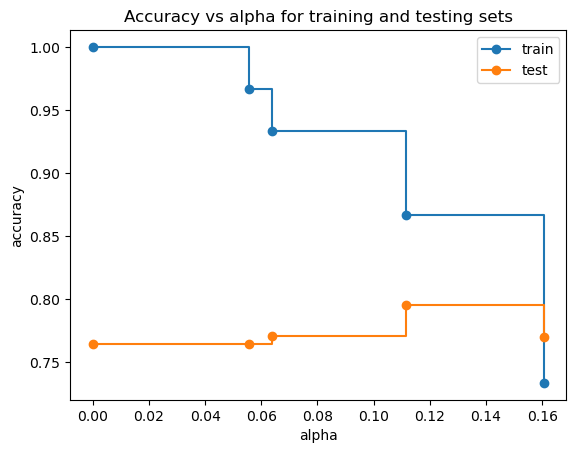

In [57]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [58]:
dt_model_ccp = DecisionTreeClassifier(random_state=0 , ccp_alpha=0.16)
dt_model_ccp.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.16, random_state=0)

[Text(0.5, 0.75, 'X[1] <= -1.098\ngini = 0.391\nsamples = 30\nvalue = [22, 8]'),
 Text(0.25, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.75, 0.25, 'gini = 0.219\nsamples = 24\nvalue = [21, 3]')]

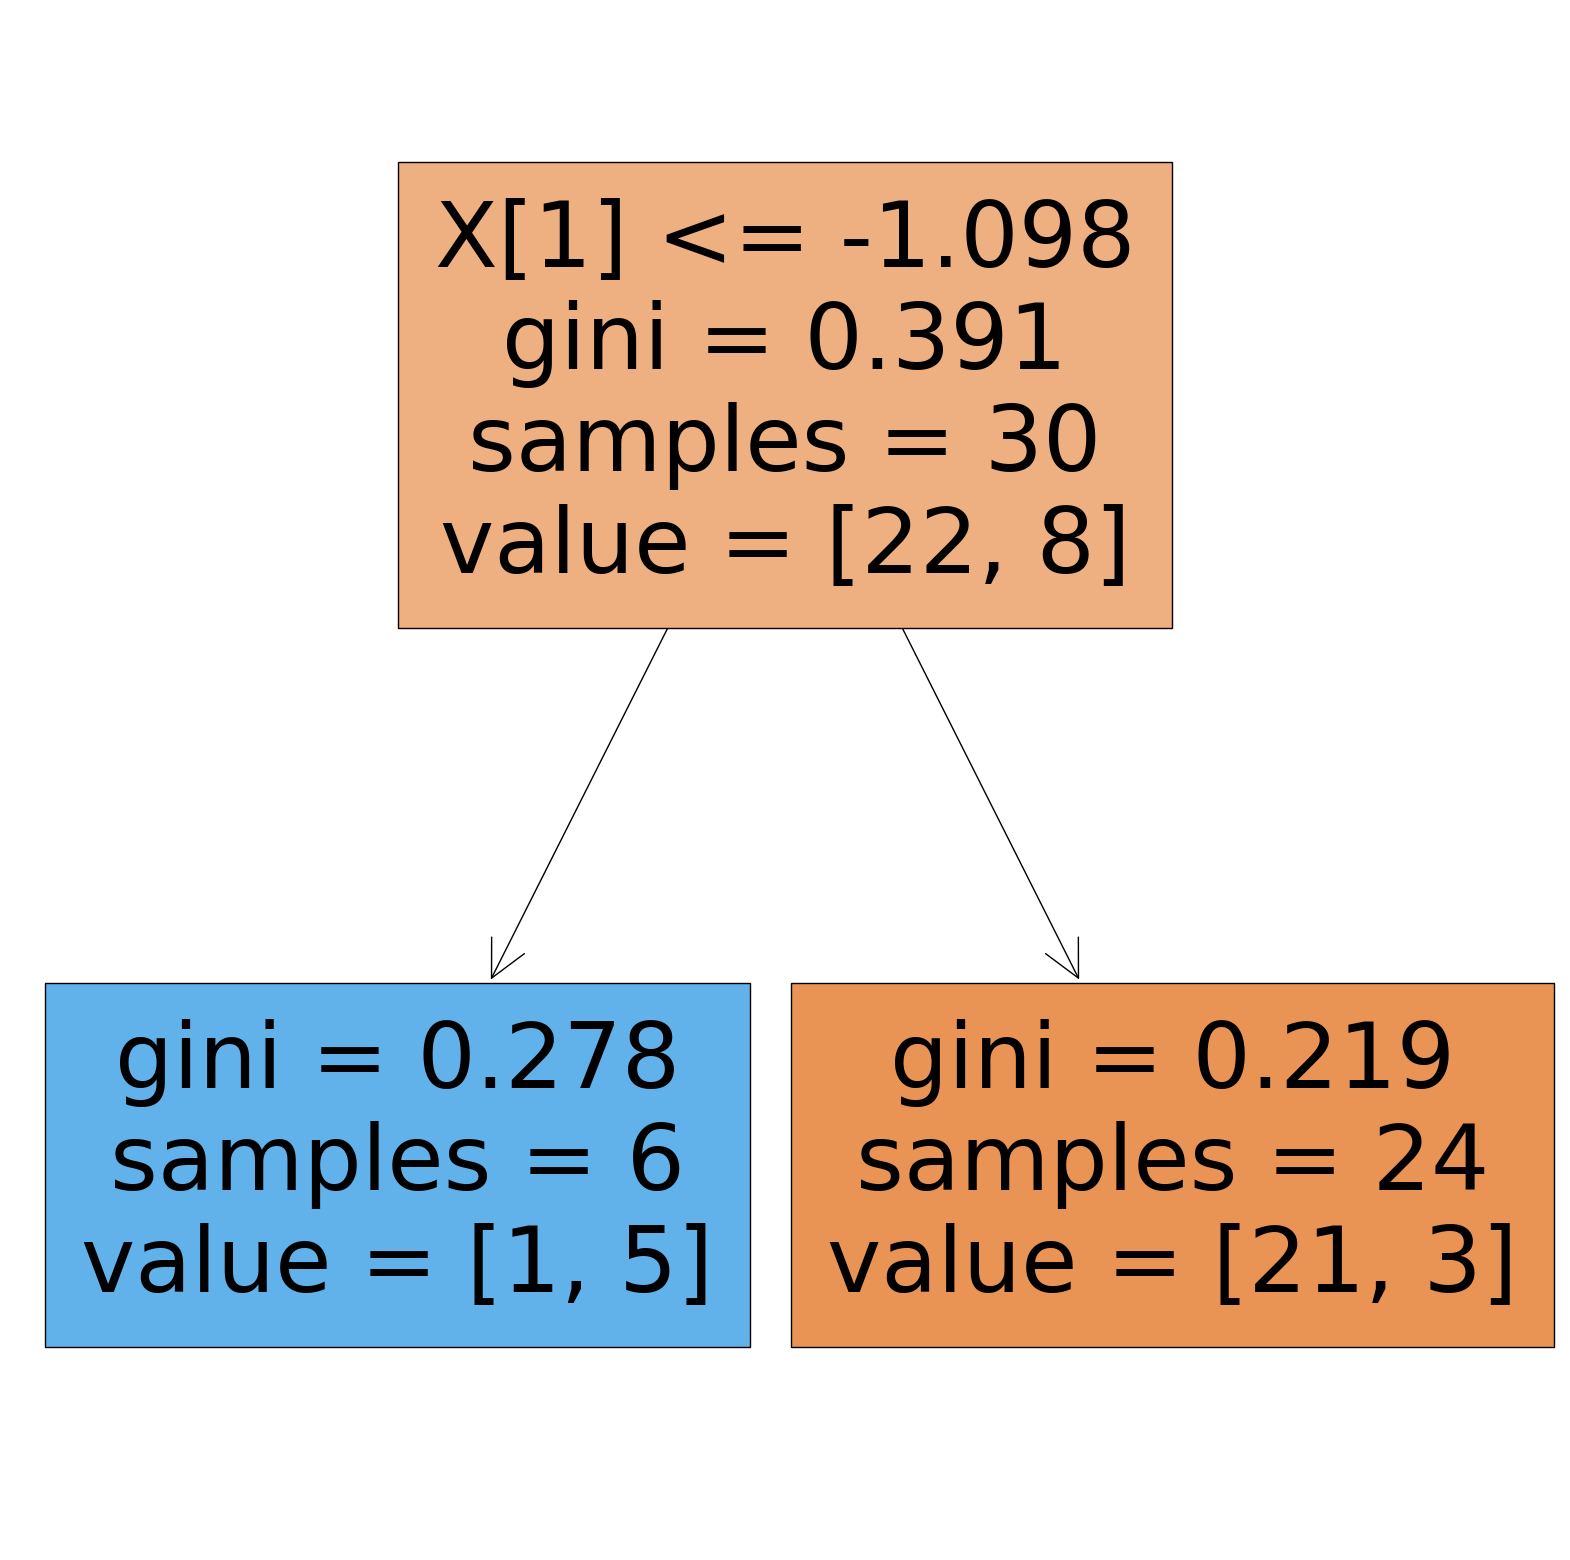

In [59]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled=True)

In [60]:
dt_model_ccp.score(x1,y1)

0.8666666666666667

In [61]:
dt_model_ccp.score(x_test,y_test)

0.7952

In [62]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [63]:
grid_pram = {"criterion":['gini','entropy'],
             "splitter":['best','random'],
             "max_depth" : range(2,40,1),
             "min_samples_split":range(2,10 ,1),
             "min_samples_leaf":range(1,10,1),
             'ccp_alpha':np.random.rand(20)
             }

In [66]:
grid_ccp = GridSearchCV(estimator=dt_model_ccp,param_grid=grid_pram , cv = 10 , verbose=1, n_jobs=-1)

In [240]:
grid_ccp.fit(x1,y1)

Fitting 10 folds for each of 611520 candidates, totalling 6115200 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(ccp_alpha=0.16, random_state=0),
             n_jobs=-1,
             param_grid={'ccp_alpha': array([0.70953803, 0.75365688, 0.03791716, 0.46222363, 0.62456778,
       0.40853223, 0.24582409, 0.1084905 , 0.26362735, 0.98666498,
       0.62388669, 0.64177325, 0.57356112, 0.70087615, 0.79884839,
       0.76002167, 0.18725632, 0.69698364, 0.3979048 , 0.48013861,
       0.78564501, 0.81138397, 0.10851084, 0.99975987, 0.16720784,
       0.53428852, 0.65873771, 0.53052861, 0.90546125, 0.0278928 ]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 30),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 15),
                         'splitter': ['best', 'random']},
             verbose=1)

In [65]:
grid_ccp.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [67]:
dt_cpp_new = DecisionTreeClassifier(criterion='entropy' , max_depth=4 ,min_samples_leaf=1 , min_samples_split=7 , splitter='random',ccp_alpha= 0.03791716270071144)

In [243]:
dt_cpp_new.fit(x1,y1)


DecisionTreeClassifier(ccp_alpha=0.03791716270071144, criterion='entropy',
                       max_depth=4, min_samples_split=7, splitter='random')

In [244]:
dt_cpp_new.score(x1,y1)

0.8

In [245]:
dt_cpp_new.score(x_test,y_test)

0.7582666666666666

In [68]:
from sklearn.metrics import confusion_matrix

y_pred= dt_cpp_new.predict(x_test)



NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [249]:
cm = confusion_matrix(y_test, y_pred)

In [250]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_3 = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


In [251]:
model_3

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.758267,0.477284,0.542343,0.507738,0.682529


In [69]:
## model 2 SVM(classifier)
from sklearn.metrics import confusion_matrix
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(x_train, y_train)




SVC(random_state=0)

In [70]:
# Predicting the Test set results
y_pred = scv.predict(x_test)

In [85]:
scv.score(x_test,y_test)

0.8138666666666666

In [71]:
cm = confusion_matrix(y_test, y_pred)



<AxesSubplot:>

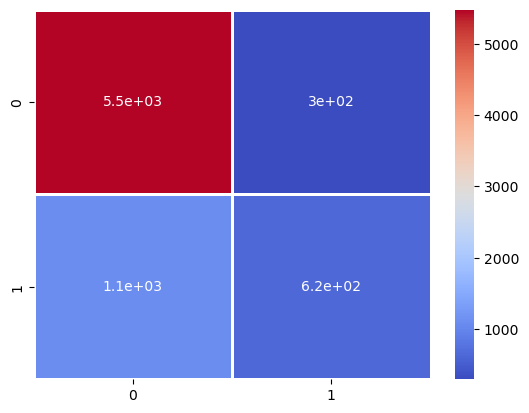

In [72]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [73]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model4 = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])



In [74]:
model4

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.813867,0.678649,0.361369,0.471612,0.655148


# Now we will pickle the model file for deployement 




In [75]:
import pickle

In [88]:
pickle.dump(scv,open('svm(c).pkl','wb'))

In [87]:
pickle.dump(dt_cpp_new,open('Dtc.pkl','wb'))